In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('../Datasets/MX_ciudades.csv', delimiter='\t', header = None)

In [4]:
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

Dataset has 1019 rows and 3 columns.


In [5]:
data = data.rename(columns={0: 'x', 1 : 'y',2: 'Ciudad'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1019 non-null   float64
 1   y       1019 non-null   float64
 2   Ciudad  1019 non-null   object 
dtypes: float64(2), object(1)
memory usage: 24.0+ KB


In [6]:
print(len(np.unique(data['Ciudad'])))

927


In [7]:
#Usar en caso de que los valores repetidos sean erroneos
#data = data.drop_duplicates(subset=['Ciudad'], keep = 'first')

In [8]:
X = data.iloc[:, : 2].values

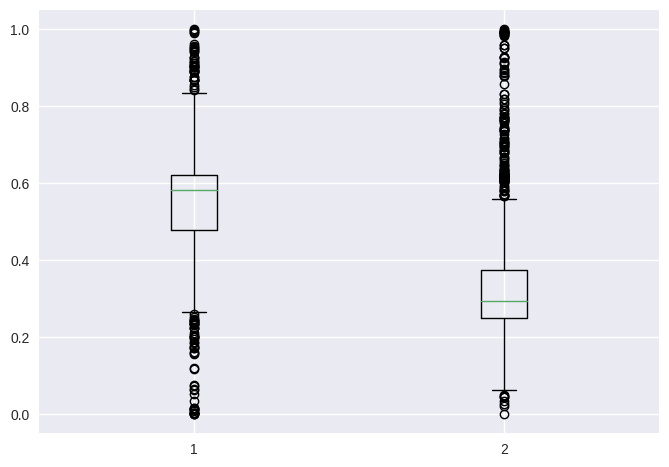

In [9]:
fig, ax = plt.subplots()
ax.boxplot(X)
plt.show()

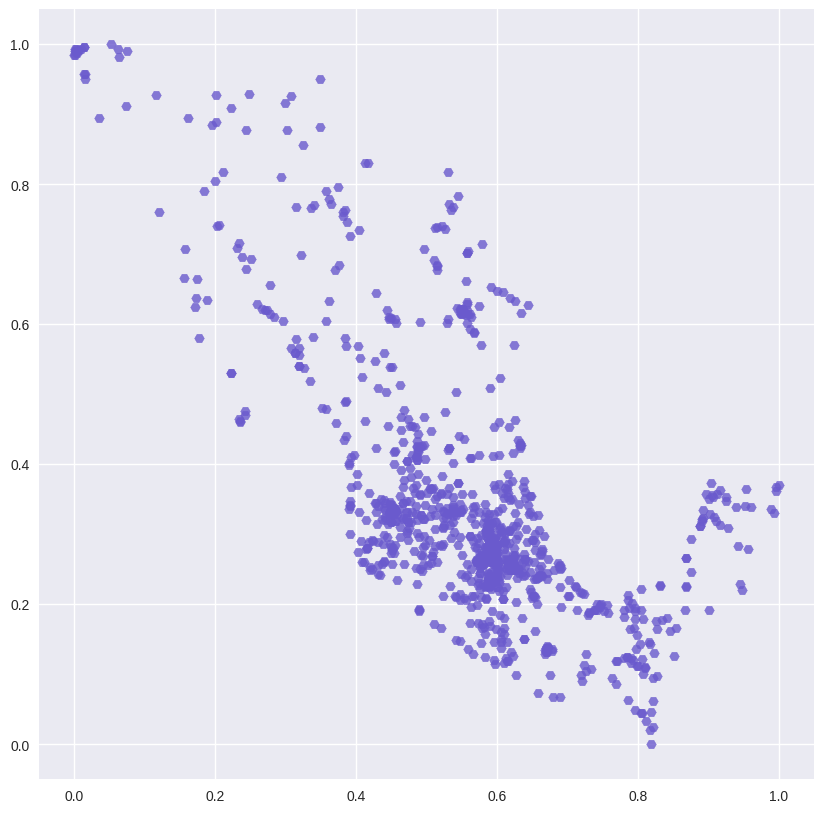

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(data['x'],data['y'], alpha=0.8, marker = 'H', color = 'slateblue')
plt.show()

## 1. Para cada ciudad $v$ encontrar la distancia esperada al resto de las ciudades $E(v)$.

In [11]:
cities = data.iloc[:, :2].values

expected = []
for i in range(cities.shape[0]):
    city = cities[i]
    distances = np.linalg.norm(cities - city, axis=1)
    distances = np.delete(distances, i)
    expected.append(np.mean(distances))

data['E(V)'] = expected

In [12]:
#Como se puede observar se agrego una nueva columna con las distancias medias
data.head(10)

,x,y,Ciudad,E(V)
0,0.603244,0.460621,Gustavo A. Madero,0.245573
1,0.623385,0.569956,San Fernando,0.319692
2,0.608631,0.646459,Gustavo Díaz Ordaz,0.372660
3,0.592009,0.290783,Zumpango,0.181526
4,0.577937,0.172304,Zumpango del Río,0.233677
5,0.668376,0.128981,Zimatlán de Álvarez,0.280691
6,0.582696,0.342819,Zimapan,0.189163
7,0.642953,0.289361,Zaragoza,0.197989
8,0.606628,0.337948,Zacualtipán,0.191842
9,0.629557,0.298356,Zacatlán,0.192372


## 2. Para cada ciudad $v$ encontrar la distancia minima (Exlcuida $v$). $m(v)$ (La distancia a la ciudad mas cercana).

In [13]:
m = []
x_min = []
y_min = []
min_city = []

cities = data.iloc[:, :2].values

for i in range(data.shape[0]):
    city = cities[i]
    dif = cities - city
    distances = np.linalg.norm(dif, axis=1)
    sort_index = np.argsort(distances)
    min_index = sort_index[1]
    city_min = data.iloc[min_index, 2]
    min_distance = distances[min_index]
    min_x = cities[min_index][0]
    min_y = cities[min_index][1]
    
    m.append(min_distance)
    x_min.append(min_x)
    y_min.append(min_y)
    min_city.append(city_min)

data['min(V)'] = m
data['min_city'] = min_city
data['min_city_x'] = x_min
data['min_city_y'] = y_min

In [14]:
data.head()

,x,y,Ciudad,E(V),min(V),min_city,min_city_x,min_city_y
0,0.603244,0.460621,Gustavo A. Madero,0.245573,0.009954,Ciudad Mante,0.596151,0.453637
1,0.623385,0.569956,San Fernando,0.319692,0.046759,Linares,0.576630,0.570597
2,0.608631,0.646459,Gustavo Díaz Ordaz,0.372660,0.008278,Camargo,0.600451,0.647730
3,0.592009,0.290783,Zumpango,0.181526,0.001876,Fraccionamiento la Trinidad,0.592559,0.292577
4,0.577937,0.172304,Zumpango del Río,0.233677,0.004964,Chichihualco,0.572983,0.172626


## 3. Para cada ciudad encontrar la distancia maxima $M(v)$ (la distancia a la cidad mas lejana)

In [15]:
M = []
x_max = []
y_max = []
max_city = []

cities = data.iloc[:, :2].values

for i in range(data.shape[0]):
    city = cities[i]
    distances = np.linalg.norm(cities - city, axis=1, ord = 2)
    max_index = np.argmax(distances)
    city_max = data.iloc[max_index, 2]
    max_distance = distances[max_index]
    max_x = cities[max_index][0]
    max_y = cities[max_index][1]
    M.append(max_distance)
    x_max.append(max_x)
    y_max.append(max_y)
    max_city.append(city_max)

data['max(V)'] = M
data['max_city'] = max_city
data['max_city_x'] = x_max
data['max_city_y'] = y_max

In [16]:
data.head()

,x,y,Ciudad,E(V),min(V),min_city,min_city_x,min_city_y,max(V),max_city,max_city_x,max_city_y
0,0.603244,0.460621,Gustavo A. Madero,0.245573,0.009954,Ciudad Mante,0.596151,0.453637,0.803568,Tijuana,0.00141,0.993085
1,0.623385,0.569956,San Fernando,0.319692,0.046759,Linares,0.576630,0.570597,0.752257,Tijuana,0.00141,0.993085
2,0.608631,0.646459,Gustavo Díaz Ordaz,0.372660,0.008278,Camargo,0.600451,0.647730,0.699190,Tijuana,0.00141,0.993085
3,0.592009,0.290783,Zumpango,0.181526,0.001876,Fraccionamiento la Trinidad,0.592559,0.292577,0.917625,Tijuana,0.00141,0.993085
4,0.577937,0.172304,Zumpango del Río,0.233677,0.004964,Chichihualco,0.572983,0.172626,1.003028,Tijuana,0.00141,0.993085


### 4.Grafica [$E(V),m(V)$].

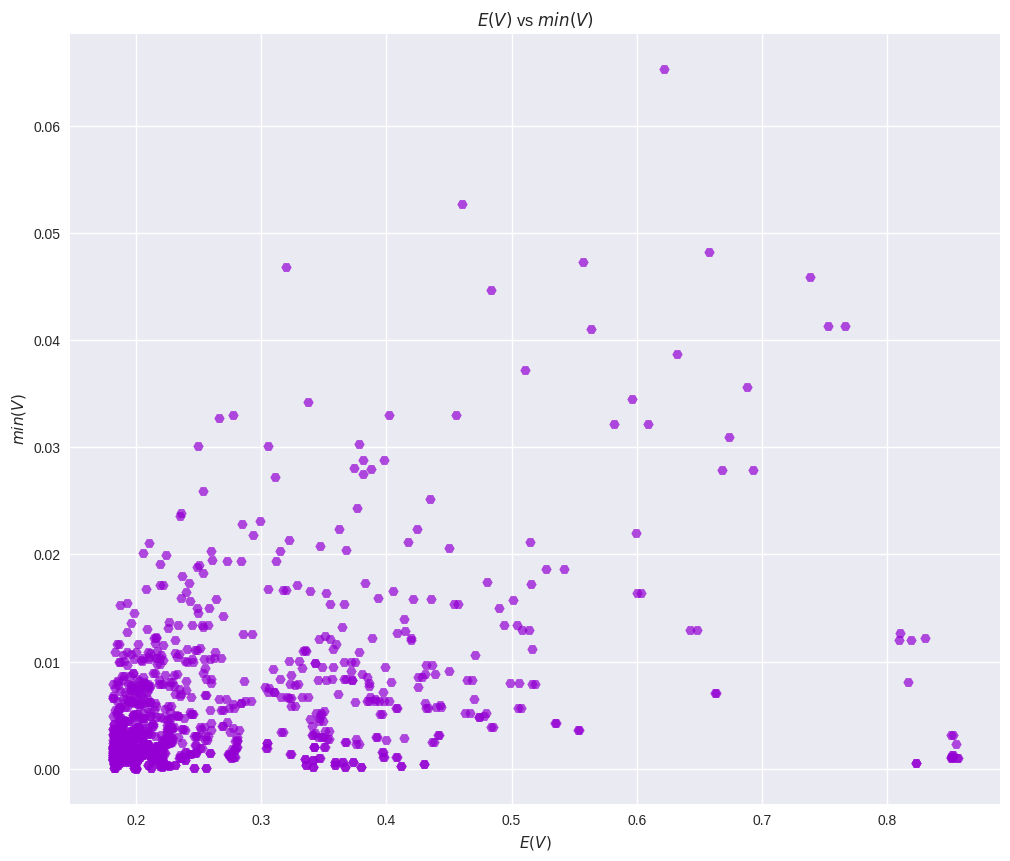

In [17]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(data['E(V)'], data['min(V)'], color = 'darkviolet', alpha = 0.7, marker = 'H')
ax.set_xlabel("$E(V)$")
ax.set_ylabel("$min(V)$")
ax.set_title("$E(V)$ vs $min(V)$")
fig.show()

### 5.Grafica [$E(V),M(V)$].

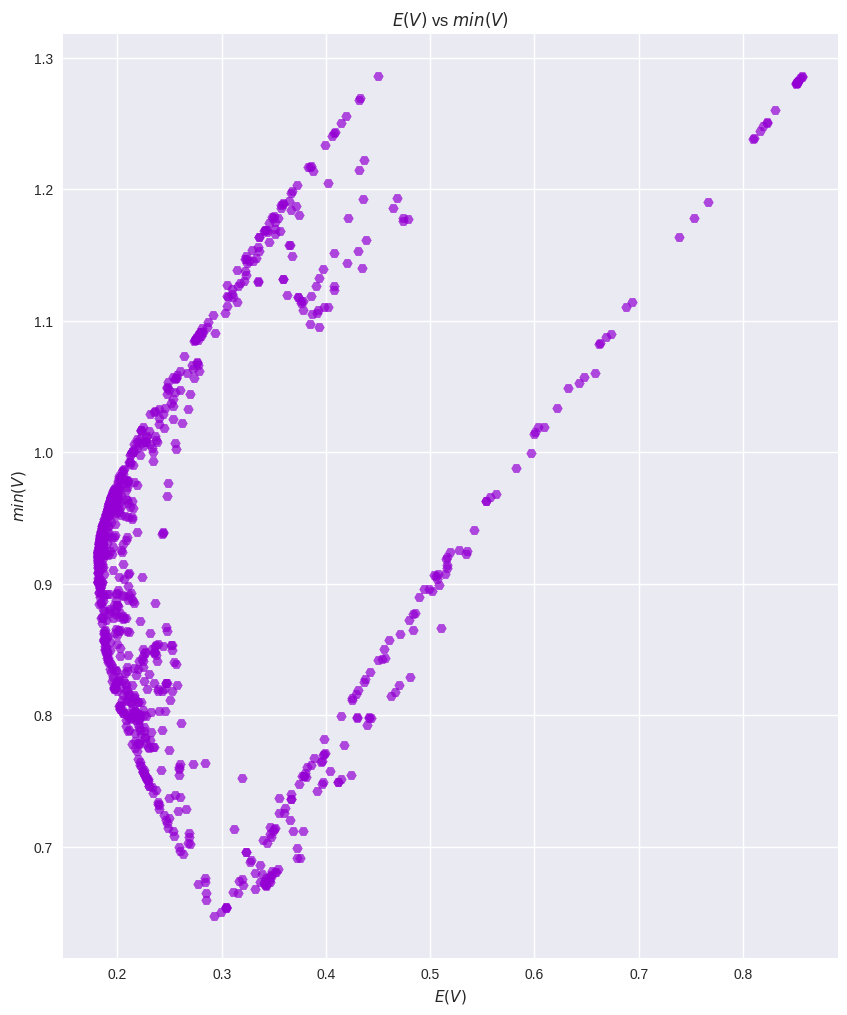

In [18]:
fig, ax = plt.subplots(figsize=(10,12))
ax.scatter(data['E(V)'], data['max(V)'], color = 'darkviolet', alpha = 0.7, marker = 'H')
ax.set_xlabel("$E(V)$")
ax.set_ylabel("$min(V)$")
ax.set_title("$E(V)$ vs $min(V)$")
fig.show()

### 6.Grafica [$m(V),M(V)$].

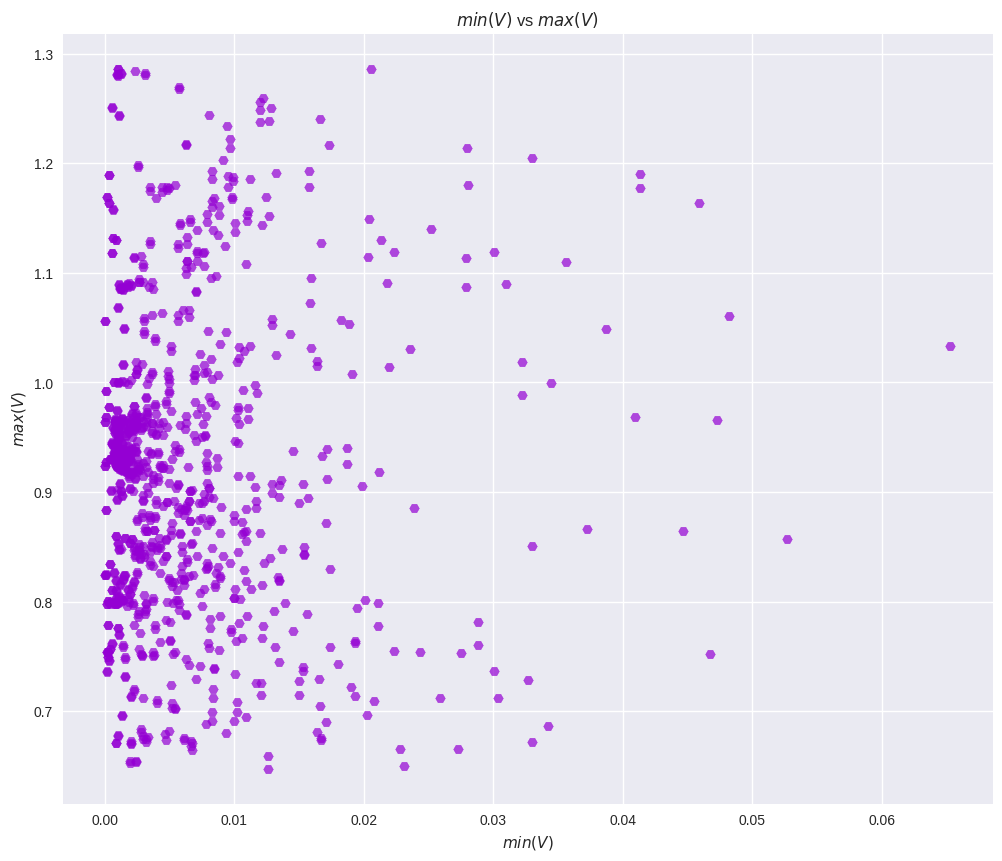

In [19]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(data['min(V)'], data['max(V)'], color = 'darkviolet', alpha = 0.7, marker = 'H' )
ax.set_xlabel("$min(V)$")
ax.set_ylabel("$max(V)$")
ax.set_title("$min(V)$ vs $max(V)$")
fig.show()

### 7. Sea $K1st(v)$ la ciudad mas cercana a $v$. Sea $Lk1st$ a la lista formada por $K1st(v)$ para toda $V$ en el conjunto. ¿CUal es la ciudad mas frecuente en $Lk1st$?

In [20]:
counts = data['min_city'].value_counts()
max_rep = max(counts)

In [21]:
print(counts[counts == max_rep])

Zapotiltic      5
Santa Anita     5
Ometepec        5
Malinaltepec    5
Name: min_city, dtype: int64


### 7. Sea $K2st(v)$ la segunda ciudad mas cercana a $v$. Con distancia $M2(V)$, Sea $Lk2st$ a la lista formada por $K2st(v)$ para toda $V$ en el conjunto. ¿CUal es la ciudad mas frecuente en $Lk2st$?

In [22]:
m2 = []
x_min2 = []
y_min2 = []
min_city2 = []

cities = data.iloc[:, :2].values

for i in range(data.shape[0]):
    city = cities[i]
    dif = cities - city
    distances = np.linalg.norm(dif, axis=1)
    sort_index = np.argsort(distances)
    min_index = sort_index[2]
    city_min = data.iloc[min_index, 2]
    min_distance = distances[min_index]
    min_x = cities[min_index][0]
    min_y = cities[min_index][1]
    
    m2.append(min_distance)
    x_min2.append(min_x)
    y_min2.append(min_y)
    min_city2.append(city_min)

data['min2(V)'] = m2
data['min2_city'] = min_city2
data['min2_city_x'] = x_min2
data['min2_city_y'] = y_min2

In [23]:
count = data['min2_city'].value_counts()
max_rep = max(count)

In [24]:
print(count[count == max_rep])

Venustiano Carranza    7
Name: min2_city, dtype: int64


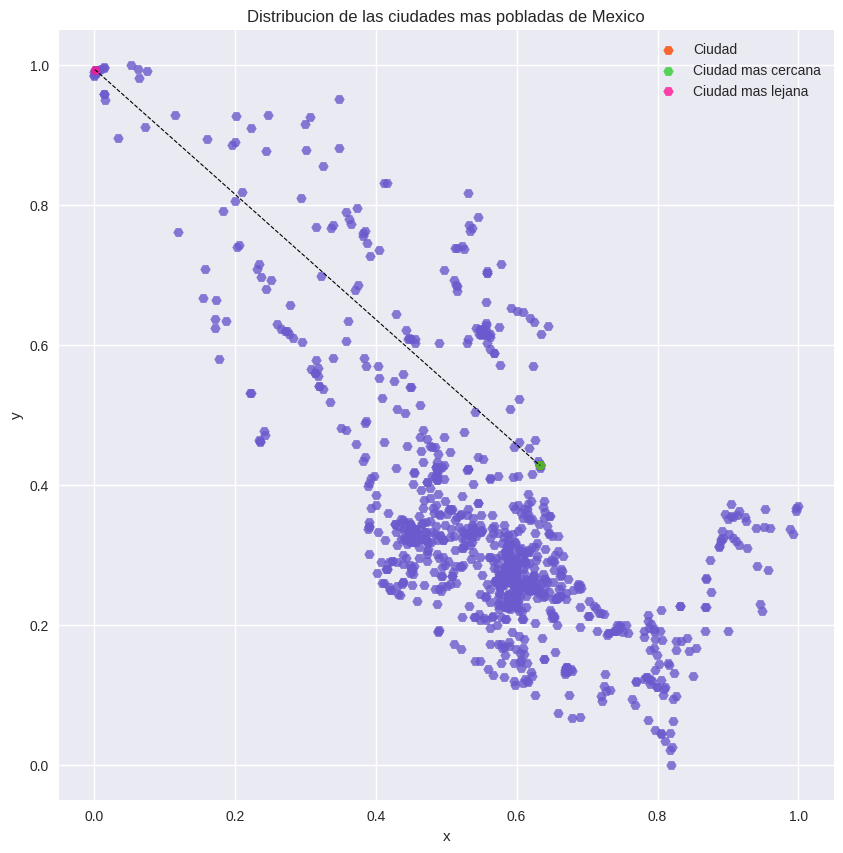

In [25]:
p = 99
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(data['x'],data['y'], alpha=0.8, marker = 'H', color = 'slateblue')
ax.scatter(data['x'][p],data['y'][p], alpha=0.8, marker = 'H', color = 'orangered', label = 'Ciudad')
ax.scatter(data['min_city_x'][p],data['min_city_y'][p], alpha=0.8, marker = 'H', color = 'limegreen', label = 'Ciudad mas cercana')
ax.scatter(data['max_city_x'][p],data['max_city_y'][p], alpha=0.8, marker = 'H', color = 'deeppink', label = 'Ciudad mas lejana')
ax.plot([data['max_city_x'][p], data['x'][p]], [data['max_city_y'][p], data['y'][p]], color='black', linestyle = '--', linewidth = 0.8)
ax.plot([data['x'][p], data['min_city_x'][p]], [data['y'][p], data['min_city_y'][p]], color='black', linestyle = '--', linewidth = 0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Distribucion de las ciudades mas pobladas de Mexico')
ax.legend()
plt.show()